<b>Project: No-show appointments

<b>Introduction

This project will use the dataset collects from 100k medical appointments in Brazil to investigate what are those factors impacted a patient in showing up at his/her appointment. 

<b>Exploratory data analysis

<b>PatientId</b>- Unique ID number for each patient.

<b>AppointmentId</b> - Unique ID number for appointment.
<b>Gender</b>- The gender of patient identified as: Male or Female.

<b>ScheduledDay</b> - The date the appointment was made.

<b>AppointmentDay</b> - The date of the appointment.

<b>Age</b> - The age of the patient.

<b>Neighbourhood</b> - The area name of the appointment takes place. 

<b>Scholarship</b> - Whether the patient qualifies for financial aid.

<b>Hypertension</b> - Whether the patient has high blood pressure.

<b>Diabetes</b> - Whether the patient has diabetes.

<b>Alcoholism</b> - Whether the patient is an alcoholic.

<b>Handicap</b> - Whether the patient is handicap.

<b>SMS_received</b> - Whether the patient has received one or more SMS messages as reminder for the appointment.

<b>No-show</b> - Whether the patient showed up for their appointment. No means they showed up, Yes means they didn't show up.

Import the libraries that will be used for analysis.

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df= pd.read_csv('C:/Users/clair/Desktop/Udacity/Project/noshowappointments.csv')

General Properties

In [124]:
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Get basic information about the data frame:

In [125]:
df.shape

(110527, 14)

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


<B> Cleaning the dataset

Check to see if there is any duplicate record exists

In [127]:
sum(df.duplicated())

0

Change data type for <i>ScheduleDay</i> and <i>AppointmentDay </i> into datetime format

In [128]:
df['ScheduledDay']=pd.to_datetime(df['ScheduledDay']).dt.date


In [129]:
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay']).dt.date


Create a column indicating the day of the week in which the appointment takes place.

In [130]:
df['AppointmentDateInTheWeek']=pd.to_datetime(df['AppointmentDay']).dt.day_name()

Correct PatiendId data type to integer.

In [131]:
df['PatientId'].astype(int)
df['PatientId']

0         2.987250e+13
1         5.589978e+14
2         4.262962e+12
3         8.679512e+11
4         8.841186e+12
              ...     
110522    2.572134e+12
110523    3.596266e+12
110524    1.557663e+13
110525    9.213493e+13
110526    3.775115e+14
Name: PatientId, Length: 110527, dtype: float64

Correct name of misspelling columns.

In [132]:
df.rename(columns={'Handcap':'Handicap', 'Hipertension':'Hypertension'},inplace=True)

Check if there are incorrect data for column Age. For example: Patient's age should not be smaller than 0.

In [133]:
neg_age=df.loc[df['Age']<0].index
neg_age

Int64Index([99832], dtype='int64')

In [134]:
df.drop(neg_age, inplace=True)

Drop column PatientId and AppointmentId from the dataframe because it does not hold critical support for the analyzing purpose.

In [135]:
df.drop(['PatientId','AppointmentID'],axis=1, inplace= True)

In [136]:
df.shape

(110526, 13)

In [137]:
df.columns

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood',
       'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap',
       'SMS_received', 'No-show', 'AppointmentDateInTheWeek'],
      dtype='object')

Check the number of patients who did not show up for the appointment.

In [138]:
df['No-show'].value_counts()

No     88207
Yes    22319
Name: No-show, dtype: int64

There are 22319 patients were absent from the appointment that they scheduled. 

In [139]:
ratio=len(df[df['No-show']== 'Yes'])/len(df[df['No-show']=='No'])
ratio

0.2530298048907683

The number of showing up instances is about 4 times more than the number of absence cases. This might imposes an imbalanced problem in data distribution later when we build predictive model.

Now we create a new column that used to calculate the number of days in between Scheduled day and Appointment day.

In [140]:
df['GapDate']= df['AppointmentDay']-df['ScheduledDay']

In [141]:
df['GapDate']=pd.to_numeric(df['GapDate'],downcast='signed')

Gap date has to have positive value which is bigger than 0 days. If the value is negative, there is an error occured because the appointment date can't happen before the date when the patient make a schedule.

In [142]:
DateError= df.loc[df['GapDate']<0].index

Delete the records that are identified as errors.

In [143]:
df.drop(DateError,inplace=True)

In [144]:
df.shape

(110521, 14)

<b>Research Question: Does Gender affect patients'decision on showing up on time for the appointment?

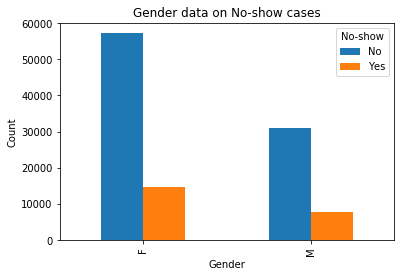

In [145]:
pd.crosstab(df['Gender'],df['No-show']).plot(kind='bar')
plt.title('Gender data on No-show cases')
plt.xlabel('Gender')
plt.ylabel('Count');

The dataset from the survey were collected from more Female than Male applications.

We separated the data into 2 dataset where one is data of people who showed up for the appointments and the other for people who did not.

In [146]:
Absence=df[df['No-show'] == "Yes"]
ShowUp=df[df['No-show']=="No"]

The ratio of the number of Female who did not show up for the appointment over the Female population in the dataset.

In [147]:
F_Noshow=round(len(Absence[Absence['Gender']== "F"])/len(df[df['Gender']=="F"]),4)
print("Percentage of Female not shown up for appointment is",F_Noshow *100)

Percentage of Female not shown up for appointment is 20.31


The ratio of the number of Male who did not show up for the appointment over the Male population in the dataset.

In [148]:
M_Noshow=round(len(Absence[Absence['Gender']== "M"])/len(df[df['Gender']=="M"]),4)
print("Percentage of Male not shown up for appointment is",M_Noshow *100)

Percentage of Male not shown up for appointment is 19.96


Replace the value in No-show column from object type "No" and" Yes" to interger type of 0 and 1 respectively.

In [149]:
df['No-show'].replace({'No': 0, 'Yes': 1},inplace=True)

Looking at the absence ratio of each gender, we can see there is not much difference between them. Gender itself does not have strong significant implication on whether a patient is likely to skip the appointment.

<b>Research Question: What age group is likely to not show up to appointment?

In [150]:
Absence['Age'].mean()

34.31787218786412

The average age of people who did not show up for the appointment is 34 years old. However, we can discover more what is the group age that most likely to skip their appointments. 
<BR/> Kids (0 ~ 14 years old)
<BR/> Youth (15 ~ 24 years old)
<BR/> Adults (25 ~ 64 years old)
<BR/> Seniors (65 years old and over)

Finding Mean noshow  for different age groups.

In [151]:
Kids= df[df['Age']<=14].mean()['No-show']
Youth= df[df['Age'].between (15,24,inclusive= True)].mean()['No-show']
Adults= df[df['Age'].between (25,64, inclusive=True)].mean()['No-show']
Seniors= df[df['Age']>= 65].mean()['No-show']

In [152]:
print("Kids:",Kids,"/ Youth:",Youth,"/ Adults:",Adults,"/ Seniors:",Seniors)

Kids: 0.2117733058135535 / Youth: 0.2525699600228441 / Adults: 0.19741402745684383 / Seniors: 0.15498923685855148


Looking at the absence ratio of each group. We can see that seniors (65 years old and over) is most likely to show up at their appointments while the Youth (15 to 24 years old) group shows they tends to skip their appointments more than the rest of other group age.

<b>Research Question: Does the appointment date affect patients'decision on showing up on time for the appointment?

I want to discover which date of the appointment date has been skipped the most.

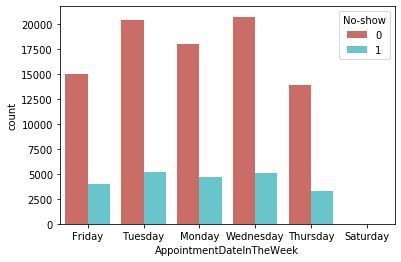

In [153]:
sns.countplot(x='AppointmentDateInTheWeek',hue='No-show',data=df, palette='hls');

In [154]:
WeekDay=df.groupby(['AppointmentDateInTheWeek','No-show'])
WeekDay.size()

AppointmentDateInTheWeek  No-show
Friday                    0          14982
                          1           4037
Monday                    0          18024
                          1           4689
Saturday                  0             30
                          1              9
Thursday                  0          13909
                          1           3337
Tuesday                   0          20488
                          1           5150
Wednesday                 0          20774
                          1           5092
dtype: int64

Based on the graph and number of the absence cases of each day in the week, Tuesday and Wednesday have the highest number of cases that patients did not show up for their appointment. Let's look at the ratio of the absence case over the total number of the appointment made in each day.

In [155]:
Ratio_Monday= round((Absence['AppointmentDateInTheWeek']=="Monday").sum()/(df['AppointmentDateInTheWeek']=="Monday").sum(),4)
Ratio_Tuesday= round((Absence['AppointmentDateInTheWeek']=="Tuesday").sum()/(df['AppointmentDateInTheWeek']=="Tuesday").sum(),4)
Ratio_Wednesday= round((Absence['AppointmentDateInTheWeek']=="Wednesday").sum()/(df['AppointmentDateInTheWeek']=="Wednesday").sum(),4)
Ratio_Thursday= round((Absence['AppointmentDateInTheWeek']=="Thursday").sum()/(df['AppointmentDateInTheWeek']=="Thursday").sum(),4)
Ratio_Friday= round((Absence['AppointmentDateInTheWeek']=="Friday").sum()/(df['AppointmentDateInTheWeek']=="Friday").sum(),4)
Ratio_Saturday= round((Absence['AppointmentDateInTheWeek']=="Saturday").sum()/(df['AppointmentDateInTheWeek']=="Saturday").sum(),4)

In [156]:
print("Monday :",Ratio_Monday * 100, "%", "Tuesday: ", Ratio_Tuesday* 100, "%", "Wednesday :", Ratio_Wednesday* 100, "%","Thursday :", Ratio_Thursday* 100, "%","Friday: ",Ratio_Friday* 100, "%","Saturday :",Ratio_Saturday* 100, "%" )

Monday : 20.64 % Tuesday:  20.09 % Wednesday : 19.689999999999998 % Thursday : 19.35 % Friday:  21.23 % Saturday : 23.080000000000002 %


The ratios during each day of the week are pretty much similar to each other. We can see that the Day of the week does not seem a good predictor to the outcome variable why patients skipped their appointments. 

<b>Research Question: Does receiving SMS affect patients'decision on showing up on time for the appointment?

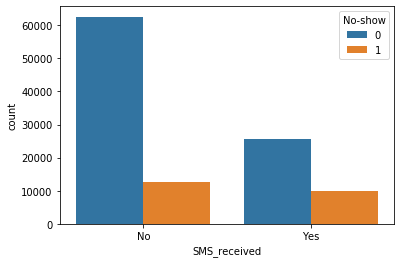

In [157]:
sns.countplot(x='SMS_received',hue='No-show',data=df)
plt.xticks([0,1],['No','Yes']);

Find the ration of the people who received the text message over the total number of people did not show up for their appointment. 

In [158]:
len(df[(df['No-show']== 1) & (df['SMS_received']==0)])/len(df[df['No-show']==1])*100

56.153087747602406

In [159]:
len(df[(df['No-show']== 1) & (df['SMS_received']==1)])/len(df[df['No-show']==1])*100

43.846912252397594

Alomost 44 percent of people who did not show up on time for their appointment received SMS reminder.

In [160]:
len(df[(df['No-show']== 0) & (df['SMS_received']==1)])/len(df[df['No-show']==0])*100

29.133742220005214

29 percent of people who showed up for the appointment received SMS text.
<br>  The ratio shows that receiving SMS does not have significantly impact on patients showing up on time.

<b>Research Question: Does receiving scholarship affect patients'decision on showing up on time for the appointment?

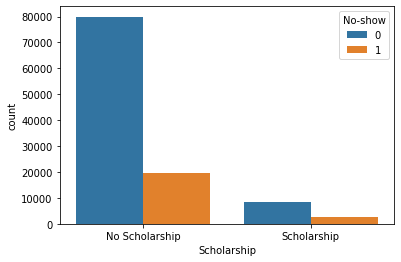

In [161]:
sns.countplot(x='Scholarship', hue='No-show',data=df)
plt.xticks([0,1],['No Scholarship','Scholarship']);

Find the ration of the people who received scholarship over the total number of people did not show up for their appointment. 

In [162]:
len(df[(df['No-show']== 1) & (df['Scholarship']==1)])/len(df[df['No-show']==1])*100

11.553284933225777

11 percent of people did not show up had scholarship. 

In [163]:
len(df[(df['No-show']== 1) & (df['Scholarship']==0)])/len(df[df['No-show']==1])*100

88.44671506677422

88 percent of people did not show up did not have scholarship. This makes sense because financial help obviously helps with the motivation of getting health check up.

Let's look at the ratio of having scholarship within patients who did not show up for appointments over the total of people received scholarship.

In [164]:
len(df[(df['No-show']== 1) & (df['Scholarship']==1)])/len(df[df['Scholarship']==1])*100

23.73630420771568

Let's look at the ratio of not having scholarship within patients who did not show up for appointments over the total of people did not receive scholarship.

In [165]:
len(df[(df['No-show']== 1) & (df['Scholarship']==0)])/len(df[df['Scholarship']==0])*100

19.803331326510136

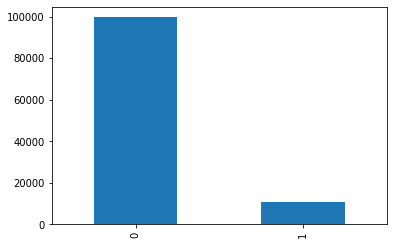

In [166]:
df['Scholarship'].value_counts().plot(kind='bar')

<b>Next step: </b> 
    <br> Replace the value in Gender column from object type "F" and" M" to interger type of 0 and 1 respectively.

In [167]:
df['Gender'].replace({'F':0,'M':1},inplace=True)

In [168]:
df.head(5)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,AppointmentDateInTheWeek,GapDate
0,0,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,Friday,0
1,1,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,Friday,0
2,0,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,Friday,0
3,0,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,Friday,0
4,0,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,Friday,0


In [169]:
df['Handicap'].value_counts()

0    108282
1      2040
2       183
3        13
4         3
Name: Handicap, dtype: int64

The handicap value should be Yes or No as the context of the dataset. We can see that Handicap column contain 5 unique values. 

In [170]:
df['Handicap']=df['Handicap'].apply(lambda x: 1 if x>=1 else 0)
df['Handicap'].unique()

array([0, 1], dtype=int64)

The dependent variable is the value in No-show column. The other predictors in this dataset will be tested to see if they have correlation with the outcome. First, we need to check if there is collinearity among the covariates.

We exclude ScheduledDay, AppointmentDay and Neighbourhood because they do not add much value into our analysis at this point.

In [171]:
X=df[['Age','Scholarship','Diabetes', 'Alcoholism','Gender','Handicap','Hypertension','SMS_received']]

In [172]:
X.head(20)

,Age,Scholarship,Diabetes,Alcoholism,Gender,Handicap,Hypertension,SMS_received
0,62,0,0,0,0,0,1,0
1,56,0,0,0,1,0,0,0
2,62,0,0,0,0,0,0,0
3,8,0,0,0,0,0,0,0
4,56,0,1,0,0,0,1,0
5,76,0,0,0,0,0,1,0
6,23,0,0,0,0,0,0,0
7,39,0,0,0,0,0,0,0
8,21,0,0,0,0,0,0,0
9,19,0,0,0,0,0,0,0


In [173]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [174]:
VIF_df=pd.DataFrame()

In [175]:
VIF_df['Factors']=X.columns

In [176]:
VIF_df['VIF']=[variance_inflation_factor(X.values,i) for i in range (X.shape[1])]

In [177]:
print(VIF_df)

        Factors       VIF
0           Age  2.358326
1   Scholarship  1.061408
2      Diabetes  1.339173
3    Alcoholism  1.061292
4        Gender  1.306160
5      Handicap  1.032573
6  Hypertension  1.872168
7  SMS_received  1.343574


All the VIFs of these predictors are very low values. We can conclude there is no correlation between the independent variable and other variables.

We can use correlation matrix to test the variables.

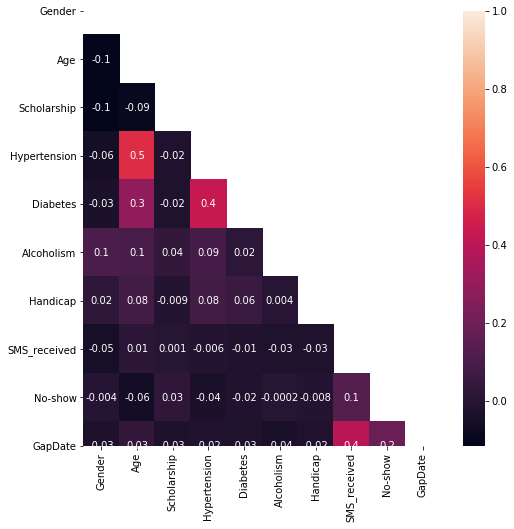

In [178]:
fig, ax = plt.subplots(figsize=(8,8))
matrix=np.triu(df.corr())
sns.heatmap(df.corr(),annot=True,fmt='.1g',mask=matrix);

Set up features and target variables:

In [179]:
x= df[['Age','Scholarship','Diabetes', 'Alcoholism','Gender','Handicap','Hypertension','SMS_received']]

In [180]:
y= df['No-show']

In [181]:
import statsmodels.api as sm
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.523974
         Iterations 6
                          Results: Logit
Model:              Logit            Pseudo R-squared: -0.042     
Dependent Variable: No-show          AIC:              115836.2078
Date:               2020-12-31 00:30 BIC:              115913.1115
No. Observations:   110521           Log-Likelihood:   -57910.    
Df Model:           7                LL-Null:          -55595.    
Df Residuals:       110513           LLR p-value:      1.0000     
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
------------------------------------------------------------------
                  Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
Age              -0.0298   0.0003 -103.9949 0.0000 -0.0304 -0.0293
Scholarship      -0.3337   0.0237  -14.0754 0.0000 -0

The pvalue of Handicap is over 0.05 means there is no significant relationship between this factor and the outcome of our study. 
<br> Therefore, we create new set of independent variables.

In [182]:
newX=df[['Age','Scholarship','Diabetes', 'Alcoholism','Gender','Hypertension','SMS_received']]

Test the model with prediction capability.
Split the dataset into train and test. Using Logistic Regression to build model

In [183]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(newX, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
model=logreg.fit(X_train, y_train)

In [184]:
prediction=model.predict(X_test)

In [185]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))

             precision    recall  f1-score   support

          0       0.80      1.00      0.89     26469
          1       0.00      0.00      0.00      6688

avg / total       0.64      0.80      0.71     33157



In [186]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,prediction))

[[26469     0]
 [ 6688     0]]


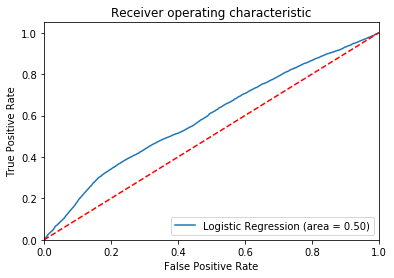

In [187]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
FPR, TPR, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(FPR, TPR, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')

The ROC curve comes closer to the diagnol of ROC space meaning it shows less accurate of the model's performance. 

As we have seen in the parameter of confusion matrix for the prediction ability of logistic model. Eventhough the accuracy score of the model is around 0.8, The model can't be used to predict the outcome due to it failed in predict class 1 (patients did not show up for appointment)

We can use other statistical model building method for this dataset. I decided to use RandomForest to see whether this method makes a better predictive model.

<b> Random Forest method:

In [188]:
from sklearn.ensemble import RandomForestClassifier

In [189]:
clf=RandomForestClassifier(n_estimators=100)

In [190]:
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [191]:
print(accuracy_score(y_test, y_pred))

0.7942817504599331


In [192]:
print(confusion_matrix(y_test,y_pred))

[[26228   241]
 [ 6580   108]]


In [193]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.80      0.99      0.88     26469
          1       0.31      0.02      0.03      6688

avg / total       0.70      0.79      0.71     33157



The Random Forest method is better than Logistic Regression method in predicting class 1 (no-show for appointment). However, this method only can predict correctly 109 out of 6688 observations in the dataset. 